
# Tyre strategies during a race

Plot all drivers' tyre strategies during a race.


In [19]:
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt

In [20]:
fastf1.Cache.enable_cache("./cache")

Load the race session



In [21]:
event_name = "Austrian"
session = fastf1.get_session(2023, event_name, 'FP1')
session.load()
laps = session.laps

session_name = session.name



core           INFO 	Loading data for Austrian Grand Prix - Practice 1 [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found f

Get the list of driver numbers



In [22]:
drivers = session.drivers
print(drivers)

['1', '2', '4', '10', '11', '14', '16', '18', '20', '21', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']


Convert the driver numbers to three letter abbreviations



In [23]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'SAR', 'NOR', 'GAS', 'PER', 'ALO', 'LEC', 'STR', 'MAG', 'DEV', 'TSU', 'ALB', 'ZHO', 'HUL', 'OCO', 'HAM', 'SAI', 'RUS', 'BOT', 'PIA']


We need to find the stint length and compound used
for every stint by every driver.
We do this by first grouping the laps by the driver,
the stint number, and the compound.
And then counting the number of laps in each group.



In [24]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber", "TyreLife", "FreshTyre"]]
stints = stints.groupby(["Driver", "Stint", "Compound", "FreshTyre"])
stints = stints.count().reset_index()

In [25]:
stints.head()

,Driver,Stint,Compound,FreshTyre,LapNumber,TyreLife
0,ALB,1.0,MEDIUM,True,2,2
1,ALB,2.0,SOFT,True,16,16
2,ALB,3.0,SOFT,False,1,1
3,ALB,4.0,SOFT,False,1,1
4,ALB,5.0,SOFT,False,3,3


The number in the LapNumber column now stands for the number of observations
in that group aka the stint length.



In [26]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
# print(stints)

Now we can plot the strategies for each driver



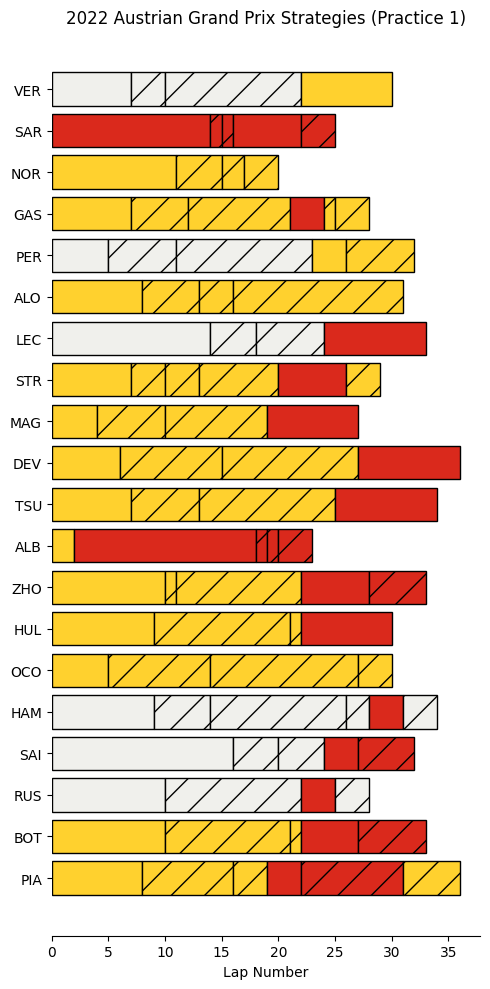

In [27]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        if row["FreshTyre"] == False:
            plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True,
            hatch=r'/'
        )
        else: 
            plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]


plt.title(f"2022 {event_name} Grand Prix Strategies ({session_name})")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Make the plot more readable and intuitive



Plot aesthetics

